In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.insert(1, "../src")
from pca import PCAOurs
from knn import KNNClassifier
from knn_with_pca import KNN_with_PCA_Classifier

In [2]:
from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import sklearn.decomposition as skld

# Analisis de tope de K (KNN) y α (PCA)

## Busquemos un tope para α viendo cuanta varianza de los datos cubre

## Con SKLearn

In [10]:
df = pd.read_csv("../data/train.csv")

pca_sklrn = PCA(n_components=784)
pca_sklrn.fit(df.drop(columns="label"))

var_ratio_by_component_sklrn = pca_sklrn.explained_variance_ratio_

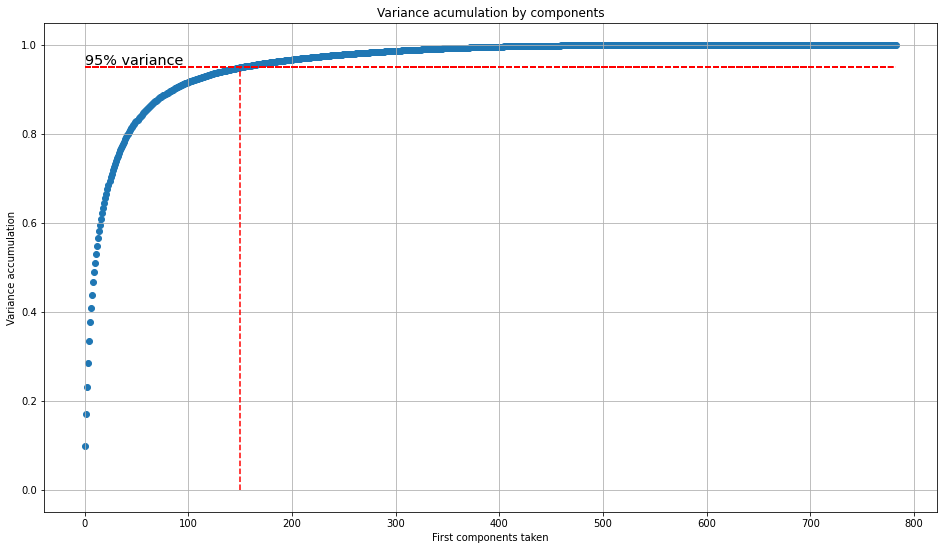

In [11]:
accumulated_by_component = np.cumsum(var_ratio_by_component_sklrn)
components_amount = [i for i in range(0, 784)]

plt.figure(figsize = (16,9))

plt.text(0, 0.95, '95% variance', va='bottom', fontsize='x-large')
plt.hlines([0.95 for i in range(1, len(accumulated_by_component) + 1)], 0, components_amount, linestyle="dashed", color='red')

plt.grid()

plt.vlines(150, 0, 0.95, linestyle="dashed", color='red')

plt.scatter(components_amount, accumulated_by_component)
plt.title("Variance acumulation by components")
plt.xlabel("First components taken")
plt.ylabel("Variance accumulation")

plt.savefig("./imgs/alpha.png")

## Nuestro

In [2]:
df = pd.read_csv("../data/train.csv")

pca_ = PCA(784)

In [3]:
pca_.fit(df)

In [4]:
var_ratio_by_component = pca_.explained_variance_ratio_

In [31]:
var_ratio_by_component

array([5.16446062e-02, 3.79315102e-02, 3.25576642e-02, 2.84966511e-02,
       2.59272817e-02, 2.27960963e-02, 1.73600340e-02, 1.53207951e-02,
       1.46575459e-02, 1.24430509e-02, 1.11210844e-02, 1.09074839e-02,
       9.01922862e-03, 8.96747497e-03, 8.37596070e-03, 7.85739875e-03,
       6.99101030e-03, 6.79519250e-03, 6.29325312e-03, 6.10668155e-03,
       5.67988774e-03, 5.37797442e-03, 5.11154523e-03, 4.83576222e-03,
       4.70223952e-03, 4.44333187e-03, 4.30078142e-03, 4.11827692e-03,
       3.92348491e-03, 3.63755966e-03, 3.48563231e-03, 3.38401473e-03,
       3.17511998e-03, 3.11974818e-03, 2.98954104e-03, 2.86575026e-03,
       2.69758225e-03, 2.58253634e-03, 2.51930831e-03, 2.47150045e-03,
       2.39949890e-03, 2.35731322e-03, 2.21569155e-03, 2.10577260e-03,
       2.03709572e-03, 1.98611972e-03, 1.91245676e-03, 1.84628164e-03,
       1.78253107e-03, 1.69909650e-03, 1.67117488e-03, 1.63768526e-03,
       1.55591158e-03, 1.51794073e-03, 1.48731315e-03, 1.42829272e-03,
      

Text(0, 0.5, 'Variance accumulation')

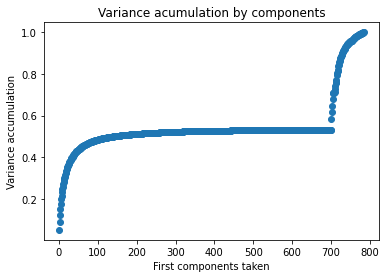

In [19]:
accumulated_by_component = np.cumsum(var_ratio_by_component)
components_amount = [i for i in range(1, len(accumulated_by_component) + 1)]
plt.scatter(components_amount, accumulated_by_component)
plt.title("Variance acumulation by components")
plt.xlabel("First components taken")
plt.ylabel("Variance accumulation")

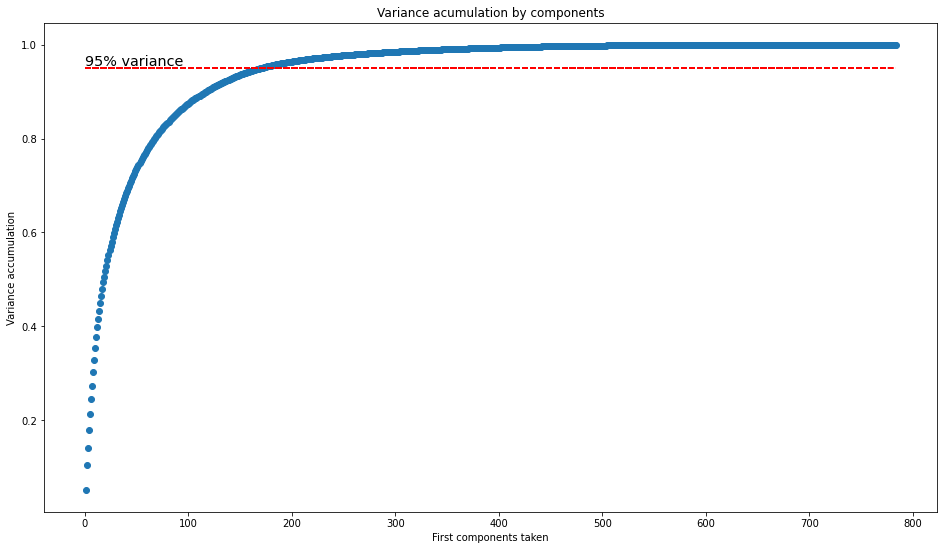

In [79]:
dup_var_ratio_by_component = var_ratio_by_component.copy()
dup_var_ratio_by_component[::-1].sort()
accumulated_by_component = np.cumsum(dup_var_ratio_by_component)
components_amount = [i for i in range(1, len(accumulated_by_component) + 1)]

plt.figure(figsize = (16,9))

plt.text(0, 0.95, '95% variance', va='bottom', fontsize='x-large')
plt.hlines([0.95 for i in range(1, len(accumulated_by_component) + 1)], 0, components_amount, linestyle="dashed", color='red')


# plt.vlines(170, 0, 0.95, linestyle="dashed", color='red')

plt.scatter(components_amount, accumulated_by_component)

plt.title("Variance acumulation by components")
plt.xlabel("First components taken")
plt.ylabel("Variance accumulation")

plt.savefig("variance_accumulation.png")

In [78]:
np.set_printoptions(threshold=sys.maxsize)
len(pca_.get_model().eigenvectors_)

785

# Busqueda de parámetros
La idea es buscar para dos pipelines cuales son sus mejores parámetros.
Por un lado vamos a tener KNN + PCA y por otro lado KNN solo.

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

In [4]:
#Levantamos el dataset
df = pd.read_csv("../data/train.csv")

## Pipeline con PCA+KNN

In [9]:
# grid = {
#     'knn__k': [2, 4, 6, 8, 10, 12, 14, 16, 18, 20],
#     'pca__alpha': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150]
# }

# pca_with_knn_pipe_exp1 = Pipeline([
#     ('pca', PCAOurs()),
#     ('knn', KNNClassifier()),
# ])

# pca_knn_cv_exp1 = GridSearchCV(
#     pca_with_knn_pipe_exp1,
#     param_grid=grid,
#     scoring=make_scorer(accuracy_score),
#     n_jobs=-1,
#     cv=10,
#     verbose=10,
# )

grid = {
    'k': [2],
    'alpha': [10],
    'epsilon': [0.00001]
}

pca_knn_cv_exp1 = GridSearchCV(
    KNN_with_PCA_Classifier(),
    param_grid=grid,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    cv=2,
    verbose=10,
)

## Solo KNN

In [12]:
grid = {
    'k': [2,3,4] + [i for i in range(5,50,5)]
}

knn_cv_exp1 = GridSearchCV(
    KNNClassifier(),
    param_grid=grid,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    cv=10,
    verbose=10,
)

## Corremos los gridsearch de PCA+KNN y solo KNN

In [6]:
train_dataset_exp1 = df.drop(columns="label")
train_label_exp1 = df["label"]

In [10]:
pca_knn_cv_exp1.fit(train_dataset_exp1, train_label_exp1)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
--KNN-- fitting with k: 2 and alpha: 784
--KNN-- fitting with k: 2 and alpha: 784
--PCA-- fitting for alpha: 10
--PCA-- fitting for alpha: 10
--PCA-- calculating eigenvectors for alpha: 10
--PCA-- calculating eigenvectors for alpha: 10


INFO:knn_with_pca:vector asdf: <class 'list'>
/home/gabriel/.pyenv/versions/3.10-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:776: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/gabriel/.pyenv/versions/3.10-dev/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/home/gabriel/.pyenv/versions/3.10-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 219, in __call__
    return self._score(
  File "/home/gabriel/.pyenv/versions/3.10-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 261, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/home/gabriel/.pyenv/versions/3.10-dev/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 71, in _cached_call
    return getattr(estimator, method)(*args, *

--KNN-- fitting with k: 2 and alpha: 784
--PCA-- fitting for alpha: 10
--PCA-- calculating eigenvectors for alpha: 10


GridSearchCV(cv=2, estimator=KNN_with_PCA_Classifier(), n_jobs=-1,
             param_grid={'alpha': [10], 'epsilon': [1e-05], 'k': [2]},
             scoring=make_scorer(accuracy_score), verbose=10)

[CV 2/2; 1/1] START alpha=10, epsilon=1e-05, k=2................................
[CV 2/2; 1/1] END ...alpha=10, epsilon=1e-05, k=2;, score=nan total time= 2.3min
[CV 1/2; 1/1] START alpha=10, epsilon=1e-05, k=2................................
[CV 1/2; 1/1] END ...alpha=10, epsilon=1e-05, k=2;, score=nan total time= 2.3min


In [18]:
pca_knn_cv_exp1.cv_results_

{'mean_fit_time': array([127.35053861]),
 'std_fit_time': array([0.00829065]),
 'mean_score_time': array([5.84512973]),
 'std_score_time': array([0.02078104]),
 'param_alpha': masked_array(data=[10],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_epsilon': masked_array(data=[1e-05],
              mask=[False],
        fill_value='?',
             dtype=object),
 'param_k': masked_array(data=[2],
              mask=[False],
        fill_value='?',
             dtype=object),
 'params': [{'alpha': 10, 'epsilon': 1e-05, 'k': 2}],
 'split0_test_score': array([nan]),
 'split1_test_score': array([nan]),
 'mean_test_score': array([nan]),
 'std_test_score': array([nan]),
 'rank_test_score': array([1], dtype=int32)}

In [ ]:
knn_cv_exp1.fit(train_dataset_exp1, train_label_exp1)

## Tomamos los mejores parámetros de PCA+KNN y variamos la cantidad de imágenes de entrenamiento

In [ ]:
# pca_knn_best_params = pca_knn_cv.best_params_
# best_k = pca_knn_best_params["k"]
# best_alpha = pca_knn_best_params["alpha"]

# for i in [100,22029,93912030,123]:
    

# pca_knn_cv = GridSearchCV(
#     pca_with_knn_pipe,
#     param_grid=grid,
#     scoring=make_scorer(accuracy_score),
#     n_jobs=-1,
#     cv=10,
#     verbose=3,
# )

## Fijamos el tamaño del dataset en 5000 y variamos el k desde 1 hasta 5000 (tomando alpha fijo como 150)

In [ ]:
grid = {
    'k': [1,2,3,4] + [i for i in range(5,125,5)] + [i for ],
    'alpha': [150]
}

pca_with_knn_pipe_exp3 = Pipeline([
    ('pca', PCA()),
    ('knn', KNNClassifier()),
])

pca_knn_cv_exp3 = GridSearchCV(
    pca_with_knn_pipe,
    param_grid=grid,
    scoring=make_scorer(accuracy_score),
    n_jobs=-1,
    cv=10,
    verbose=3,
)

## Guardamos los csv